# Session 5: Case study on Movie Lens dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

## Accessing datasets

In [2]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')
tags=pd.read_csv('tags.csv')

## Preprocessing

### With movies

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [5]:
movies.duplicated().sum()

0

In [11]:
# Splitting title into: movie_title and year

pattern=r'(.+)\s\((\d{4})\)'



In [12]:
movies[['movie_title','year']]=movies['title'].str.extract(pattern)
movies

,movieId,title,genres,movie_title,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,No Game No Life: Zero,2017
9739,193585,Flint (2017),Drama,Flint,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Bungo Stray Dogs: Dead Apple,2018


In [14]:
# Dropping title

movies.drop(['title'],axis=1,inplace=True)
movies

,movieId,genres,movie_title,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995
...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017
9738,193583,Animation|Comedy|Fantasy,No Game No Life: Zero,2017
9739,193585,Drama,Flint,2017
9740,193587,Action|Animation,Bungo Stray Dogs: Dead Apple,2018


In [15]:
movies.isnull().sum()

movieId         0
genres          0
movie_title    13
year           13
dtype: int64

In [17]:
movies=movies.dropna()

In [18]:
movies.isnull().sum()

movieId        0
genres         0
movie_title    0
year           0
dtype: int64

In [19]:
movies.duplicated().sum()

0

In [20]:
movies['year'].value_counts()

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1917      1
1915      1
1919      1
1921      1
1908      1
Name: count, Length: 106, dtype: int64

In [21]:
movies['year'].min(), movies['year'].max()

('1902', '2018')

In [22]:
movies.head()

,movieId,genres,movie_title,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995


### With ratings

In [23]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [24]:
type(ratings['timestamp'][0])

numpy.int64

In [25]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [26]:
ratings.duplicated().sum()

0

In [27]:
# Converting timestamp into datetime format

ratings['rating_time']=ratings['timestamp'].apply(lambda x:datetime.fromtimestamp(x))

ratings

,userId,movieId,rating,timestamp,rating_time
0,1,1,4.0,964982703,2000-07-31 00:15:03
1,1,3,4.0,964981247,2000-07-30 23:50:47
2,1,6,4.0,964982224,2000-07-31 00:07:04
3,1,47,5.0,964983815,2000-07-31 00:33:35
4,1,50,5.0,964982931,2000-07-31 00:18:51
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,2017-05-04 03:23:22
100832,610,168248,5.0,1493850091,2017-05-04 03:51:31
100833,610,168250,5.0,1494273047,2017-05-09 01:20:47
100834,610,168252,5.0,1493846352,2017-05-04 02:49:12


In [28]:
# Dropping

ratings.drop(['timestamp'],axis=1,inplace=True)


In [29]:
ratings.head()

,userId,movieId,rating,rating_time
0,1,1,4.0,2000-07-31 00:15:03
1,1,3,4.0,2000-07-30 23:50:47
2,1,6,4.0,2000-07-31 00:07:04
3,1,47,5.0,2000-07-31 00:33:35
4,1,50,5.0,2000-07-31 00:18:51


In [30]:
ratings.isnull().sum()

userId         0
movieId        0
rating         0
rating_time    0
dtype: int64

In [31]:
ratings.duplicated().sum()

0

In [32]:
ratings['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

### With tags

In [33]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [34]:
# Converting timestamp into datetime format

tags['tag_time']=tags['timestamp'].apply(lambda x:datetime.fromtimestamp(x))

tags

,userId,movieId,tag,timestamp,tag_time
0,2,60756,funny,1445714994,2015-10-25 00:59:54
1,2,60756,Highly quotable,1445714996,2015-10-25 00:59:56
2,2,60756,will ferrell,1445714992,2015-10-25 00:59:52
3,2,89774,Boxing story,1445715207,2015-10-25 01:03:27
4,2,89774,MMA,1445715200,2015-10-25 01:03:20
...,...,...,...,...,...
3678,606,7382,for katie,1171234019,2007-02-12 04:16:59
3679,606,7936,austere,1173392334,2007-03-09 03:48:54
3680,610,3265,gun fu,1493843984,2017-05-04 02:09:44
3681,610,3265,heroic bloodshed,1493843978,2017-05-04 02:09:38


In [35]:
# Droppin

tags.drop(['timestamp'],axis=1,inplace=True)

In [36]:
tags

,userId,movieId,tag,tag_time
0,2,60756,funny,2015-10-25 00:59:54
1,2,60756,Highly quotable,2015-10-25 00:59:56
2,2,60756,will ferrell,2015-10-25 00:59:52
3,2,89774,Boxing story,2015-10-25 01:03:27
4,2,89774,MMA,2015-10-25 01:03:20
...,...,...,...,...
3678,606,7382,for katie,2007-02-12 04:16:59
3679,606,7936,austere,2007-03-09 03:48:54
3680,610,3265,gun fu,2017-05-04 02:09:44
3681,610,3265,heroic bloodshed,2017-05-04 02:09:38


In [37]:
tags.isnull().sum()

userId      0
movieId     0
tag         0
tag_time    0
dtype: int64

In [38]:
tags.duplicated().sum()

0

## Merging

In [39]:
movies.head()

,movieId,genres,movie_title,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995


In [40]:
ratings.head()

,userId,movieId,rating,rating_time
0,1,1,4.0,2000-07-31 00:15:03
1,1,3,4.0,2000-07-30 23:50:47
2,1,6,4.0,2000-07-31 00:07:04
3,1,47,5.0,2000-07-31 00:33:35
4,1,50,5.0,2000-07-31 00:18:51


In [41]:
# Merging
df_1=pd.merge(movies,ratings,on='movieId',how='inner')
df_1

,movieId,genres,movie_title,year,userId,rating,rating_time
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,1,4.0,2000-07-31 00:15:03
1,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,5,4.0,1996-11-08 12:06:02
2,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,7,4.5,2005-01-25 12:22:26
3,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,15,2.5,2017-11-13 18:29:30
4,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,17,4.5,2011-05-18 10:58:03
...,...,...,...,...,...,...,...
100813,193581,Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017,184,4.0,2018-09-16 20:14:42
100814,193583,Animation|Comedy|Fantasy,No Game No Life: Zero,2017,184,3.5,2018-09-16 20:22:25
100815,193585,Drama,Flint,2017,184,3.5,2018-09-16 20:26:45
100816,193587,Action|Animation,Bungo Stray Dogs: Dead Apple,2018,184,3.5,2018-09-16 20:30:21


In [42]:
tags.head()

,userId,movieId,tag,tag_time
0,2,60756,funny,2015-10-25 00:59:54
1,2,60756,Highly quotable,2015-10-25 00:59:56
2,2,60756,will ferrell,2015-10-25 00:59:52
3,2,89774,Boxing story,2015-10-25 01:03:27
4,2,89774,MMA,2015-10-25 01:03:20


In [43]:
df_2=pd.merge(df_1,tags,on=['movieId','userId'],how='inner')
df_2

,movieId,genres,movie_title,year,userId,rating,rating_time,tag,tag_time
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,336,4.0,2005-07-24 23:18:49,pixar,2006-02-04 15:06:04
1,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,474,4.0,2001-01-04 08:06:00,pixar,2006-01-14 08:17:05
2,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,567,3.5,2018-05-03 00:03:21,fun,2018-05-03 00:03:33
3,2,Adventure|Children|Fantasy,Jumanji,1995,62,4.0,2018-06-13 04:21:30,fantasy,2018-06-13 04:22:09
4,2,Adventure|Children|Fantasy,Jumanji,1995,62,4.0,2018-06-13 04:21:30,magic board game,2018-06-13 04:22:12
...,...,...,...,...,...,...,...,...,...
3468,187595,Action|Adventure|Children|Sci-Fi,Solo: A Star Wars Story,2018,62,4.0,2018-06-14 05:32:30,star wars,2018-06-14 05:32:32
3469,193565,Action|Animation|Comedy|Sci-Fi,Gintama: The Movie,2010,184,3.5,2018-09-16 17:19:14,anime,2018-09-16 17:19:42
3470,193565,Action|Animation|Comedy|Sci-Fi,Gintama: The Movie,2010,184,3.5,2018-09-16 17:19:14,comedy,2018-09-16 17:19:47
3471,193565,Action|Animation|Comedy|Sci-Fi,Gintama: The Movie,2010,184,3.5,2018-09-16 17:19:14,gintama,2018-09-16 17:20:03


## Insights

In [45]:
# 1. Top 10 most rated movies

df_2.groupby('movie_title')['rating'].mean().sort_values(ascending=False).head(50)

movie_title
(500) Days of Summer                              5.0
Dead Man Walking                                  5.0
Come and See (Idi i smotri)                       5.0
South Park: Bigger, Longer and Uncut              5.0
Sound of Music, The                               5.0
Sixth Sense, The                                  5.0
Crossing Delancey                                 5.0
Shutter Island                                    5.0
Shawshank Redemption, The                         5.0
Shadowlands                                       5.0
Dead Again                                        5.0
Sense and Sensibility                             5.0
Eraserhead                                        5.0
Scott Pilgrim vs. the World                       5.0
Say Anything...                                   5.0
Saw                                               5.0
Sausage Party                                     5.0
Dr. Horrible's Sing-Along Blog                    5.0
Remains of the D

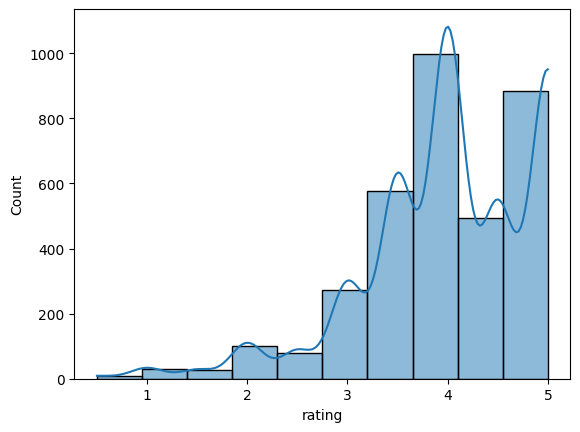

In [46]:
# 2. Distribution of rating

sns.histplot(df_2['rating'], bins=10,kde=True);

In [47]:
# 3. Most popular Genres

df_2

,movieId,genres,movie_title,year,userId,rating,rating_time,tag,tag_time
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,336,4.0,2005-07-24 23:18:49,pixar,2006-02-04 15:06:04
1,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,474,4.0,2001-01-04 08:06:00,pixar,2006-01-14 08:17:05
2,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,567,3.5,2018-05-03 00:03:21,fun,2018-05-03 00:03:33
3,2,Adventure|Children|Fantasy,Jumanji,1995,62,4.0,2018-06-13 04:21:30,fantasy,2018-06-13 04:22:09
4,2,Adventure|Children|Fantasy,Jumanji,1995,62,4.0,2018-06-13 04:21:30,magic board game,2018-06-13 04:22:12
...,...,...,...,...,...,...,...,...,...
3468,187595,Action|Adventure|Children|Sci-Fi,Solo: A Star Wars Story,2018,62,4.0,2018-06-14 05:32:30,star wars,2018-06-14 05:32:32
3469,193565,Action|Animation|Comedy|Sci-Fi,Gintama: The Movie,2010,184,3.5,2018-09-16 17:19:14,anime,2018-09-16 17:19:42
3470,193565,Action|Animation|Comedy|Sci-Fi,Gintama: The Movie,2010,184,3.5,2018-09-16 17:19:14,comedy,2018-09-16 17:19:47
3471,193565,Action|Animation|Comedy|Sci-Fi,Gintama: The Movie,2010,184,3.5,2018-09-16 17:19:14,gintama,2018-09-16 17:20:03


In [48]:
# Splitting
all_genres=df_2['genres'].str.split('|').explode()
all_genres

0       Adventure
0       Animation
0        Children
0          Comedy
0         Fantasy
          ...    
3471       Sci-Fi
3472       Action
3472    Animation
3472       Comedy
3472       Sci-Fi
Name: genres, Length: 9460, dtype: object

In [49]:
all_genres_count=all_genres.value_counts()
all_genres_count

genres
Drama          2000
Comedy         1105
Thriller       1065
Action          788
Crime           779
Sci-Fi          641
Romance         585
Adventure       582
Mystery         388
Fantasy         283
Animation       231
Horror          209
Children        183
War             153
IMAX            152
Musical         117
Documentary      97
Western          59
Film-Noir        43
Name: count, dtype: int64

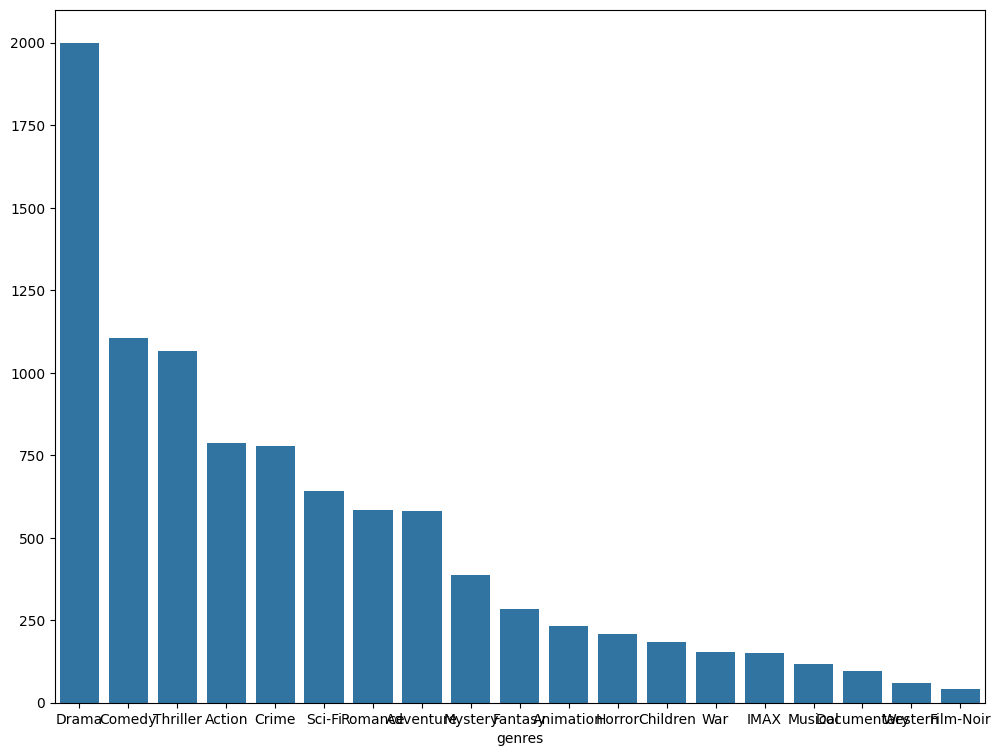

In [50]:
plt.figure(figsize=(12,9))
sns.barplot(x=all_genres_count.index, y=all_genres_count.values);

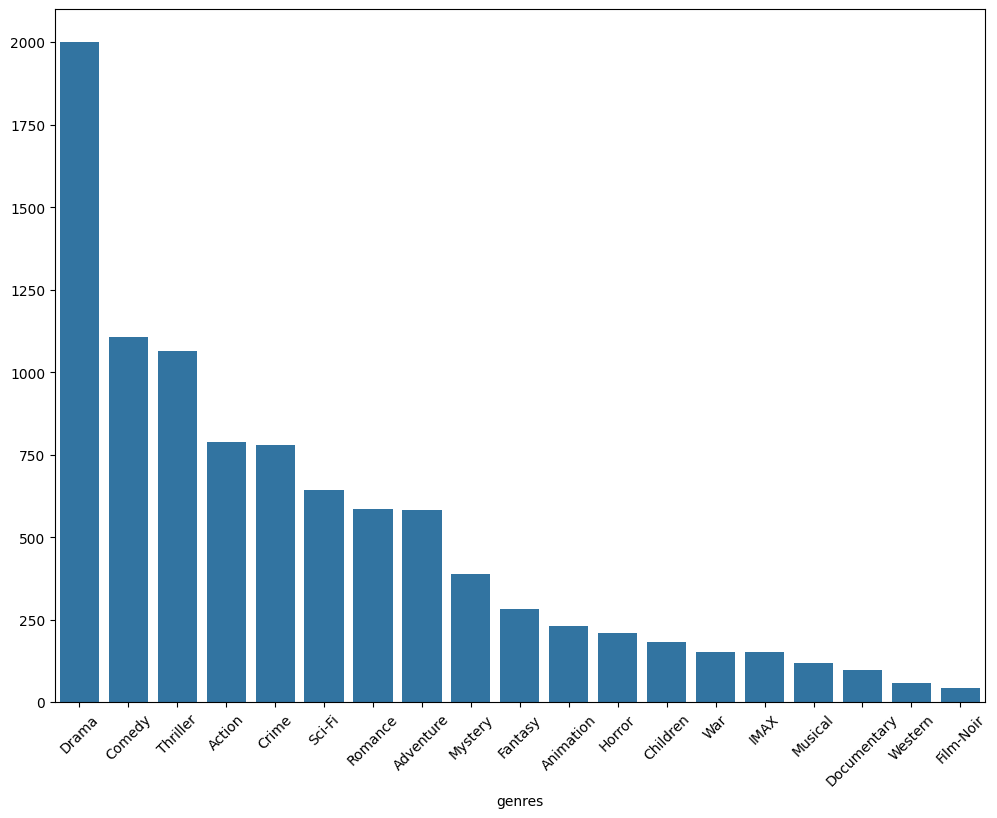

In [52]:
plt.figure(figsize=(12,9))
sns.barplot(x=all_genres_count.index, y=all_genres_count.values)
plt.xticks(rotation=45);

In [54]:
# Temporal Analysis

df_2.head()

,movieId,genres,movie_title,year,userId,rating,rating_time,tag,tag_time
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,336,4.0,2005-07-24 23:18:49,pixar,2006-02-04 15:06:04
1,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,474,4.0,2001-01-04 08:06:00,pixar,2006-01-14 08:17:05
2,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,567,3.5,2018-05-03 00:03:21,fun,2018-05-03 00:03:33
3,2,Adventure|Children|Fantasy,Jumanji,1995,62,4.0,2018-06-13 04:21:30,fantasy,2018-06-13 04:22:09
4,2,Adventure|Children|Fantasy,Jumanji,1995,62,4.0,2018-06-13 04:21:30,magic board game,2018-06-13 04:22:12


In [58]:
rating_per_month=df_2['rating_time'].dt.to_period('M')
rating_per_month.value_counts()

rating_time
2018-05    644
2017-06    323
2016-03    229
2004-11    126
2003-03    116
          ... 
2011-02      1
2009-08      1
2007-01      1
2012-07      1
2017-05      1
Freq: M, Name: count, Length: 122, dtype: int64

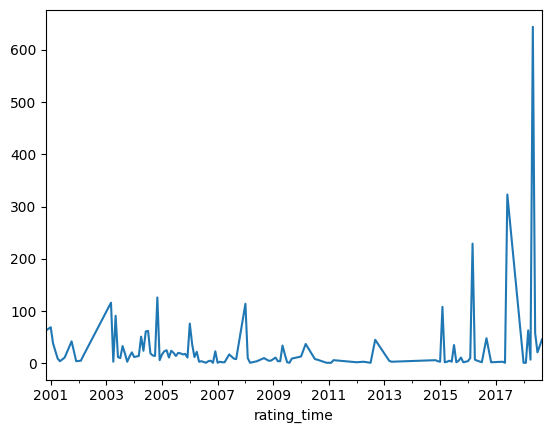

In [60]:
rating_per_month.value_counts().sort_index().plot();